In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from io import BytesIO
import boto3


In [2]:

s3_path = 's3://finalprojectbigdata2/air_quality_filtered_labeled.csv'

df = pd.read_csv(s3_path)
df.head()


,date,time,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
0,10/03/04,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/04,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/04,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/04,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/04,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [3]:

features = ['nox_gt', 'no2_gt', 'c6h6_gt', 'rh', 't']
target = 'co_gt'

X = df[features]
y = df[target]


In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [13]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print(" R² Score:", r2)


Mean Squared Error: 0.06257934273724636
 R² Score: 0.9699375740415004


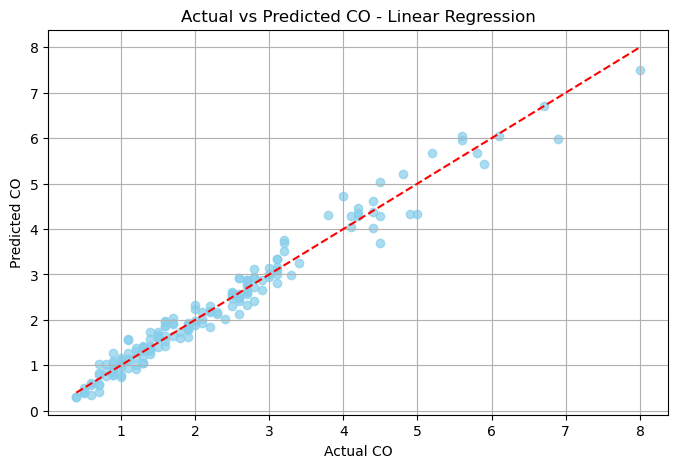

In [14]:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual CO")
plt.ylabel("Predicted CO")
plt.title("Actual vs Predicted CO - Linear Regression")
plt.grid(True)
plt.show()


In [15]:

buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

s3 = boto3.client('s3')
bucket_name = 'finalprojectbigdata2'
key = 'charts/actual_vs_predicted_co.png'

s3.upload_fileobj(buffer, bucket_name, key)

print(f" Chart uploaded to s3://{bucket_name}/{key}")


 Chart uploaded to s3://finalprojectbigdata2/charts/actual_vs_predicted_co.png


<Figure size 640x480 with 0 Axes>

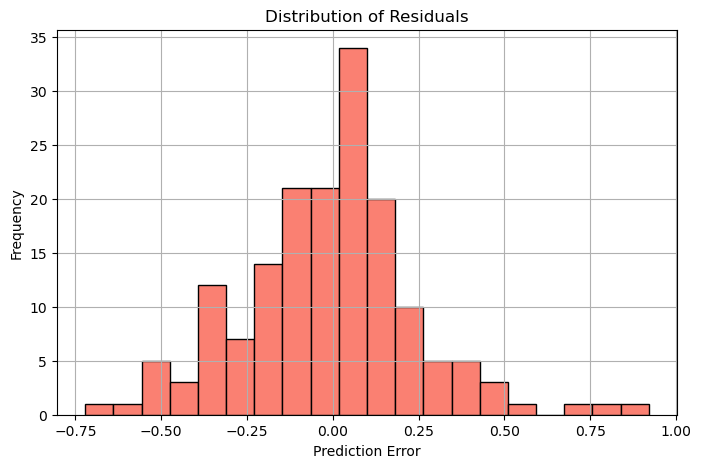

In [8]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, color='salmon', edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



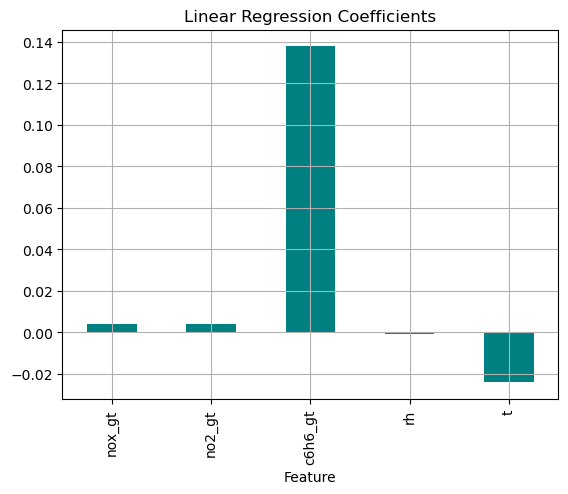

In [9]:
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
coef_df.plot(x='Feature', y='Coefficient', kind='bar', legend=False, title='Linear Regression Coefficients', color='teal')
plt.grid(True)
plt.show()


In [16]:
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

s3 = boto3.client('s3')
bucket_name = 'finalprojectbigdata2'
key = 'charts/actual_vs_predicted_co.png'

s3.upload_fileobj(buffer, bucket_name, key)

print(f" Chart uploaded to s3://{bucket_name}/{key}")


 Chart uploaded to s3://finalprojectbigdata2/charts/actual_vs_predicted_co.png


<Figure size 640x480 with 0 Axes>

In [17]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, color='salmon', edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)

buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
s3.upload_fileobj(buffer, bucket_name, 'charts/residuals_histogram.png')
print("Uploaded: residuals_histogram.png")
plt.close()

Uploaded: residuals_histogram.png


In [18]:
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

plt.figure(figsize=(8, 5))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='teal')
plt.title("Linear Regression Coefficients")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.grid(True)

buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
s3.upload_fileobj(buffer, bucket_name, 'charts/coefficients_bar_chart.png')
print(" Uploaded: coefficients_bar_chart.png")
plt.close()

 Uploaded: coefficients_bar_chart.png
